# Story 5

Andrew Bowen    
DATA 608    
CUNY Data Science

In [106]:
from matplotlib import pyplot as plt
import requests
import json
import pandas as pd
from io import StringIO, BytesIO
import numpy as np
import os
import gzip

## Data Sources

- [National Oceanic and Atmospheric Administration](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/9/1990-2023) - global time series data for 
temperature anomaly since 1990 (posted on [GitHub here]())
- [NOAA API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2#gettingStarted)
- [National Centers for Environmental Information Storm Event Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp) - data since 1950 no different storm events

In [12]:
()

()

In [3]:
# Read in Temperature anomaly data
temps = pd.read_csv("data/global-temps.csv", header=4)
temps.head()

,Year,Anomaly
0,1990,0.30
1,1991,0.39
2,1992,0.06
3,1993,0.21
4,1994,0.27


## Data Wrangling

In [4]:
# Clean up temperature Data
temps.columns = [c.lower() for c in temps.columns]

temps['year'] = temps.year.astype(str)
temps.head()

,year,anomaly
0,1990,0.30
1,1991,0.39
2,1992,0.06
3,1993,0.21
4,1994,0.27


A *temperature anomaly* in short means a deviation from the average value. In this case, our dataset about shows how much each year *deviated* from the average temperature over the period 1900 - 2000. A postivie value indicates a temperature *above* the average. Enough italics, let's quickly plot our temperature anomalies over time

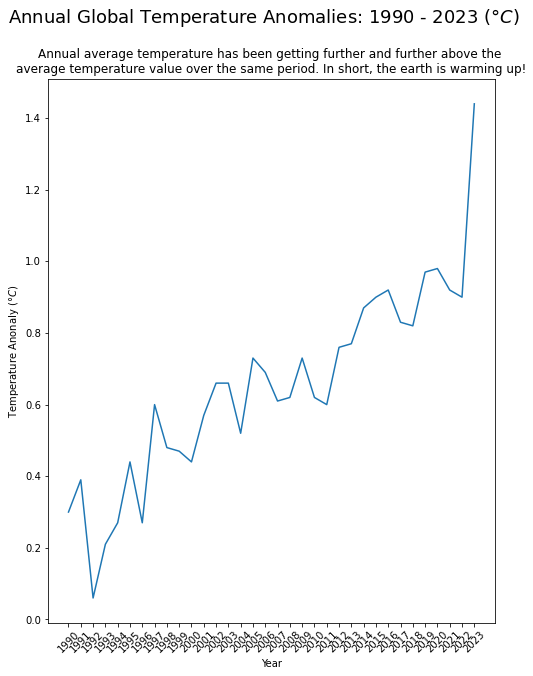

In [5]:
# Plot temperature anomalies
plt.figure(figsize=(8, 10))

plt.plot(temps['year'], temps['anomaly'])

# Add labels and title
plt.xlabel("Year")
plt.ylabel(r"Temperature Anonaly ($\degree C$)")

plt.xticks(rotation=45)
plt.suptitle(r"Annual Global Temperature Anomalies: 1990 - 2023 ($\degree C$)", fontsize=18)
plt.title("Annual average temperature has been getting further and further above the \naverage temperature value over the same period. In short, the earth is warming up!")

plt.show()

In [6]:
token = os.environ["NOAA_TOKEN"]

CeWlSDqldFjKqXONEEKAbofsvQelHhlP


In [81]:
file_index = pd.read_html("https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/")[0]
file_index = file_index.iloc[4:204]


,Name,Last modified,Size,Description
199,StormEvents_locations-ftp_v1.0_d2019_c20231017...,2023-10-17 09:23,1.7M,NaN
200,StormEvents_locations-ftp_v1.0_d2020_c20230927...,2023-09-27 14:25,1.4M,NaN
201,StormEvents_locations-ftp_v1.0_d2021_c20231017...,2023-10-17 09:24,1.2M,NaN
202,StormEvents_locations-ftp_v1.0_d2022_c20231017...,2023-10-17 09:25,929K,NaN
203,StormEvents_locations-ftp_v1.0_d2023_c20231017...,2023-10-17 09:25,942K,NaN


In [100]:
# Clean up file index data a bit
file_index['year'] = file_index['Name'].str.extract("d(\d{4})").astype(int)

# We only care about the past 25 years, so let's filter a bit
file_index = file_index.loc[file_index.year >= 1998]

file_index.head()

,Name,Last modified,Size,Description,year
52,StormEvents_details-ftp_v1.0_d1998_c20220425.c...,2022-04-25 15:06,9.8M,NaN,1998
53,StormEvents_details-ftp_v1.0_d1999_c20220425.c...,2022-04-25 15:06,9.9M,NaN,1999
54,StormEvents_details-ftp_v1.0_d2000_c20220425.c...,2022-04-25 15:06,7.5M,NaN,2000
55,StormEvents_details-ftp_v1.0_d2001_c20220425.c...,2022-04-25 15:06,6.6M,NaN,2001
56,StormEvents_details-ftp_v1.0_d2002_c20220425.c...,2022-04-25 15:06,6.9M,NaN,2002


In [109]:
def get_storm_data(path: str):
    """
    Grab file from NCEI Storm Database
    Grabs compressed CSV file, decodes it and dumps to pandas dataframe
        - https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/

    params:
        path (str): Filename or path in the NCEI database
            (e.g., `StormEvents_details-ftp_v1.0_d1950_c20210803.csv.gz`)
    returns:
        dat: (pd.DataFrame) dataframe for a single file
    """

    # Get file content
    url = f"https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/{path}"
    r = requests.get(url, stream=True)
    file_like_object = BytesIO(r.content)
    
    # Open and decode file content
    dat = None
    with gzip.open(file_like_object) as g:
        content = g.read()
        dat = pd.read_csv(StringIO(content.decode()))

    return dat



In [101]:
# Get detail files from TOC
detail_indices = file_index.Name.str.contains("details").values
detail_indices

detail_files = file_index.loc[detail_indices]

# Now for fatalities
fatality_indices = file_index.Name.str.contains("fatalities").values
fatality_indices
fatality_files = file_index.iloc[fatality_indices]


In [102]:
# Get detail files first
detail_dfs = []

for index, row in detail_files.iterrows():
    filepath = row['Name']
    dat = get_storm_data(filepath)
    detail_dfs.append(dat)

/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_71970/3806064280.py:6: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  dat = get_storm_data(filepath)
/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_71970/3806064280.py:6: DtypeWarning: Columns (29,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  dat = get_storm_data(filepath)


In [103]:
details = pd.concat(detail_dfs)

# Uncomment if you want this file written locally
details.to_csv("data/storm-details.csv", index=False)

In [104]:
# Get fatality files next
fatality_dfs = []

for index, row in fatality_files.iterrows():
    filepath = row['Name']
    dat = get_storm_data(filepath)
    fatality_dfs.append(dat)



In [105]:
fatalities = pd.concat(fatality_dfs)

# Uncomment if you want this file written locally
fatalities.to_csv("data/storm-fatalities.csv", index=False)

21875